# Predicting Heart Attacks

The objective of this case study is to fit and compare at least three different binary classifiers to predict whether an individual will report having a heart attack using the Behavioral Risk Factor Surveillance System (BRFSS) data <cite data-cite="cdc">(Centers for Disease Control and Prevention, 2018)</cite>. The descriptive features include 12 binary variables, 4 continuous variables, 2 ordinal categorical variables and 1 nominal categorical variable.

We will be using only the data from their February survey which contains about 25K observations.

The report is organized as follows:
* Section 2 (Overview) recaps Phase 1 and outlines our methodology.
* Section 3 (Data Preparation) contains our final data preparation and encoding of our data.
* Section 4 (Feature Selection) looks at several models defining our most important descriptive features for corectly categorizing our target feature.
* Section 5 (Hyperparameter Tuning) describes the process for building and tuning each of our classification algorithms.
* Section 6 (Performance Comparison) presents model performance comparison results.
* Section 7 (Limitations and Proposed Solutions) looks ath the limitations of our models, and discusses possible ways to improve our them.
* Section 8 (Summary) provides a final brief summary of our project.

## Overview

In Phase I of the project we introduced the subject of our data: predicting if someone has a heart attack. We cleaned our data and did an analysis of our descriptive features. After data preprocessing and data preparation, the following features will be used for our methodology. A few features were dropped due to irrelevance or due to missing values.


* **state**: numeric categorical 
* **gender**: binary (1 male, 2 female)
* **health status**: numeric categorical (scale from 1 to 5, from excellent to poor)
* **high blood pressure**: binary (0 no, 1 yes)
* **high cholesterol**: binary (0 no, 1 yes)
* **asthma**: binary (0 no, 1 yes)
* **arthritis**: binary (0 no, 1 yes)
* **age**: numeric categorical, six age groups (1:'18_to_24', 2:'25_to_34', 3:'35_to_44', 4:'45_to_54', 5:'55_to_64', 6:'65_or_older')
* **height**: numeric
* **weight**: numeric
* **overweight**: binary (0 no, 1 yes)
* **smoking**: binary (0 no, 1 yes)
* **alcohol**: binary (0 no, 1 yes)
* **fruit**: binary (0 no, 1 yes)
* **vegetables**: binary (0 no, 1 yes)
* **oxygen max**: numeric
* **functional capacity**: numeric
* **aerobic guideline**: binary (0 negative, 1 positive)
* **strength guideline**: binary (0 negative, 1 positive)

In this phase, binary classifiers will be constructed to predict the target feature "heart attack". Classifiers are built from the following methods:

* K-Nearest Neighbors (KNN),
* Decision Trees (DT), and
* Naive Bayes (NB).

Before going into hyperparameter tuning for each of the methods, a final round of data preparation will be performed to make sure the data is ready for the machine learning algorithms. After that, a few feature selection methods will give us an idea which features are informative in predicting our target feature. It will also indicate how many features the model might need to be meaningful.

For each model fitting, a feature selection method is added to the pipeline. In each pipeline, the Random Forest Importance method is used as a filter feature selection method. In predicting a heart attack, we are more interested in predicting positives than negatives. For that reason, we will be using the recall score to put more emphasis on positive target values. Another argument for using the recall score is having an imbalanced data set. The data set contains much more instances where people don't have a heart attack than instances where people have a heart attack. 

After hyperparameter tuning, methods are compared to each other using a paired t-test. The report finishes with a section on limitations and proposed solutions, and a final conclusion.

## Data Preparation

### Loading Data Set
We start with the data set that was preprocessed in Phase I of the project.

In [98]:
import pandas as pd
import numpy as np
np.random.seed(999)

df = pd.read_csv('phase1_data.csv', index_col = 0)
print(df.shape)
print(df.columns.values)

df.sample(n=5)

(24398, 20)
['state' 'gender' 'health_status' 'heart_attack' 'high_blood_pressure'
 'high_cholesterol' 'asthma' 'arthritis' 'age' 'height' 'weight'
 'overweight' 'smoking' 'alcohol' 'fruit' 'vegetables' 'oxygen_max'
 'functional_capacity' 'aerobic_guideline' 'strength_guideline']


,state,gender,health_status,heart_attack,high_blood_pressure,high_cholesterol,asthma,arthritis,age,height,weight,overweight,smoking,alcohol,fruit,vegetables,oxygen_max,functional_capacity,aerobic_guideline,strength_guideline
30762,56,2,3.0,0.0,0,0.0,0,0.0,5,170.0,68.04,0,0,0,1,1,25.06,4.30,1,0
4920,12,1,3.0,0.0,1,1.0,0,0.0,5,180.0,97.52,1,0,0,0,1,28.10,4.82,1,0
5120,12,2,2.0,0.0,0,1.0,0,0.0,5,157.0,86.18,1,0,0,0,1,25.80,4.42,0,1
11298,23,2,5.0,0.0,1,0.0,0,1.0,5,178.0,124.74,1,0,0,1,1,25.06,4.30,0,0
12598,24,2,2.0,0.0,0,1.0,0,1.0,6,160.0,55.34,0,0,0,1,1,16.92,2.90,1,0


### Checking for Missing Values
We take a look at the missing values in our data set. We see that most columns are complete, but still have some NAs in high_cholesterol and arthritis. With such a large data set, we will still have enough data with these removed, so we remove them.

In [99]:
df.isna().sum()

state                     0
gender                    0
health_status             0
heart_attack              0
high_blood_pressure       0
high_cholesterol       2566
asthma                    0
arthritis               123
age                       0
height                    0
weight                    0
overweight                0
smoking                   0
alcohol                   0
fruit                     0
vegetables                0
oxygen_max                0
functional_capacity       0
aerobic_guideline         0
strength_guideline        0
dtype: int64

In [100]:
df = df.dropna(axis=0, how='any')
df.isna().sum();

### Summary Statistics
Let's take a look at the summary statistics for our complete data set.

In [101]:
df.describe(include = 'all')

,state,gender,health_status,heart_attack,high_blood_pressure,high_cholesterol,asthma,arthritis,age,height,weight,overweight,smoking,alcohol,fruit,vegetables,oxygen_max,functional_capacity,aerobic_guideline,strength_guideline
count,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000,21725.000000
mean,30.177768,1.552221,2.558481,0.059287,0.419977,0.397883,0.137768,0.347894,4.581266,169.953049,82.098541,0.691093,0.139333,0.118895,0.669735,0.839678,27.773433,4.761203,0.489344,0.294177
std,16.166910,0.497277,1.073332,0.236166,0.493566,0.489472,0.344664,0.476313,1.454676,10.560795,20.356807,0.462053,0.346301,0.323673,0.470319,0.366913,7.743564,1.327521,0.499898,0.455682
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,105.000000,28.120000,0.000000,0.000000,0.000000,0.000000,0.000000,5.550000,0.950000,0.000000,0.000000
25%,19.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,163.000000,68.040000,0.000000,0.000000,0.000000,0.000000,1.000000,22.100000,3.790000,0.000000,0.000000
50%,30.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,170.000000,79.380000,1.000000,0.000000,0.000000,1.000000,1.000000,26.540000,4.550000,0.000000,0.000000
75%,42.000000,2.000000,3.000000,0.000000,1.000000,1.000000,0.000000,1.000000,6.000000,178.000000,92.990000,1.000000,0.000000,0.000000,1.000000,1.000000,32.500000,5.570000,1.000000,1.000000
max,72.000000,2.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,216.000000,272.160000,1.000000,1.000000,1.000000,1.000000,1.000000,50.100000,8.590000,1.000000,1.000000


### Encoding Features
Most features were encoded in Phase I. There are three features that need to be transformed before we can move on to feature selection.

There is one nominal category feature which is the state. In the data set, this feature is coded as integers. To make sure we treat this feature as a categorical variable we recode this with the full name of the state. Afterwards, we perform one-hot encoding for the state feature, creating a dummy variable for each state.

Another feature that will be encoded is the age variable, which consists of ordered distinct age groups. For each of the six age groups, a dummy variable will be created.

The third feature is also an ordinal category variable, measuring the health status on a scale from 1 to 5. The lowest value stands for excellent health status, the highest value for poor. For this feature we keep the integer-encoding. However, to keep the interpretation clear, we inverse the leveling of the health status: the lowest value stands for poor health, the highest value stands for excellent health.

In [102]:
# Create a copy
df_cat = df.copy()

In [103]:
state = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
             'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois',
             'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
             'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
             'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 
             'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 
             'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
             'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming', 'Guam',
             'Puerto Rico']

k=0
state_num_sorted = np.sort(df_cat.state.unique())
for j in state_num_sorted:
    df_cat.loc[df_cat['state'] == j, 'state'] = state[k]
    k = k + 1

In [104]:
df_cat = pd.get_dummies(df_cat)

In [105]:
df_cat['age'].value_counts()

6    7875
5    5216
4    3647
3    2413
2    1797
1     777
Name: age, dtype: int64

In [106]:
age_groups = ['18_to_24', '25_to_34', 
               '35_to_44', '45_to_54', 
               '55_to_64', '65_or_older']
k=0
age_num_sorted = np.sort(df_cat.age.unique())
for j in age_num_sorted:
    df_cat.loc[df_cat['age'] == j, 'age_group'] = age_groups[k]
    k = k + 1

# Drop numerical age feature
df_cat = df_cat.drop(columns = 'age')

# One-hot-encoding for age_group feature
df_cat = pd.get_dummies(df_cat)
df_cat.sample(n=5)

,gender,health_status,heart_attack,high_blood_pressure,high_cholesterol,asthma,arthritis,height,weight,overweight,...,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,age_group_18_to_24,age_group_25_to_34,age_group_35_to_44,age_group_45_to_54,age_group_55_to_64,age_group_65_or_older
25432,2,5.0,0.0,0,1.0,0,0.0,168.0,68.04,0,...,0,0,0,0,0,0,0,1,0,0
5104,1,4.0,0.0,1,1.0,0,0.0,173.0,176.90,1,...,0,0,0,0,0,0,1,0,0,0
13772,2,4.0,1.0,0,0.0,0,1.0,157.0,52.16,0,...,0,0,0,0,0,0,0,0,0,1
14118,1,5.0,0.0,1,1.0,0,1.0,180.0,96.16,1,...,0,0,0,0,0,0,0,0,0,1
22839,2,1.0,0.0,0,0.0,0,0.0,170.0,72.57,1,...,0,0,0,0,0,0,0,1,0,0


In [93]:
df_cat['health_status_inv'] = df_cat['health_status']

k = 0
healh_status_sort = np.sort(df_cat.health_status.unique())
for j in healh_status_sort:
    df_cat.loc[df_cat['health_status_inv'] == j, 'health_status'] = 6-j
    k = k + 1
    
df_cat = df_cat.drop(columns = 'health_status_inv')
df_cat.columns;

### Encoding Target Feature
The target feature, 'heart attack', is a binary variable. This feature was processed in Phase I, coded with a one for heart attack and a zero for no heart attack. In the code below, the data with descriptive features and the target feature will be separated.

In [11]:
df = df_cat.copy()
# Column order in df should be the same as in Data
df['y_heart_attack'] = df['heart_attack']
df = df.drop(columns = 'heart_attack')

# Split data and target
Data = df.drop(columns = 'y_heart_attack')
target = df['y_heart_attack']

### Scaling Descriptive Features
Each descriptive feature in the data set will be normalized between zero and one. 

In [12]:
from sklearn import preprocessing
Data = preprocessing.MinMaxScaler().fit_transform(Data)

C:\Users\olivi\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Feature Selection

### Performance with Full Set of Features
Using the 1-nearest neighbor classifier, using stratified 5-fold cross-validation with 3 repetitions.

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# 1-nearest neighbor classifier
clfr = KNeighborsClassifier(n_neighbors = 1)

In [14]:
from sklearn.model_selection import RepeatedStratifiedKFold
# 5-fold cross validation with 3 repetition
cv_method = RepeatedStratifiedKFold(n_splits = 5,
                                   n_repeats = 3,
                                   random_state = 999)
scoring_metric = 'accuracy'

In [15]:
from sklearn.model_selection import cross_val_score
# Peforming cross validation
cv_results_full = cross_val_score(estimator = clfr,
                                 X = Data,
                                 y = target,
                                 cv = cv_method,
                                 scoring = scoring_metric)

In [16]:
print(cv_results_full.mean().round(3))
cv_results_full

0.9


array([0.89576622, 0.90036815, 0.90379747, 0.89917127, 0.89663904,
       0.8971468 , 0.89668661, 0.90356732, 0.90032228, 0.89940147,
       0.8971468 , 0.90865163, 0.90057537, 0.90331492, 0.90078269])

With the full set of features and with the 1-nearest neighbor classifier as the wrapper, an average accuracy is achieved of 90.0%.

### Feature Ranking
In this section a number of best features are found using the F-score, mutual information and random forest importance.

#### Using F-score
There are six features that are standing out in importance using the F-score method:
* health status,
* high blood pressure,
* oxygen max,
* functional capacity,
* high cholesterol, and
* age group 65 or older
The feature arthritis is scoring less on importance compared to the best six, but still relatively better than the other features.

Using the best seven features, the accuracy performance is equal to 90.3%, which is 0.3% better than using the full set of features.

In [17]:
# number of features to be selected
num_features = 10

In [18]:
from sklearn import feature_selection as fs

fs_fit_fscore = fs.SelectKBest(fs.f_classif, k=num_features)
fs_fit_fscore.fit_transform(Data, target)

fs_indices_fscore = np.argsort(fs_fit_fscore.scores_)[::-1][0:num_features]
fs_indices_fscore

best_features_fscore = df.columns[fs_indices_fscore].values
best_features_fscore

array(['health_status', 'high_blood_pressure', 'oxygen_max',
       'functional_capacity', 'high_cholesterol', 'age_group_65_or_older',
       'arthritis', 'gender', 'age_group_35_to_44', 'age_group_25_to_34'],
      dtype=object)

In [19]:
feature_importances_fscore = fs_fit_fscore.scores_[fs_indices_fscore]
feature_importances_fscore

array([982.83427495, 654.52122767, 617.63912182, 617.62069739,
       521.56552048, 478.59920742, 268.2859618 , 149.98064838,
       115.13911103, 103.97169113])

In [20]:
import altair as alt
alt.renderers.enable('notebook')

def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.75, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

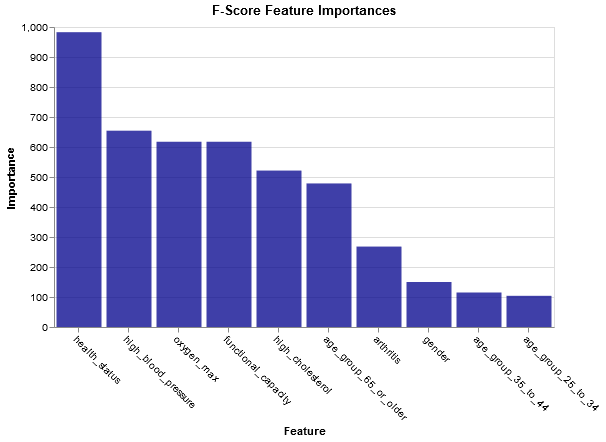

In [21]:
plot_imp(best_features_fscore, feature_importances_fscore, 'F-Score', 'darkblue')

In [22]:
Data[:, fs_indices_fscore].shape

(21725, 10)

In [23]:
cv_results_fscore = cross_val_score(estimator=clfr,
                             X=Data[:, fs_indices_fscore],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_fscore.mean().round(3)

0.902

#### Using Mutual Information
There are six features that are standing out in importance using mutual information:
* health status, 
* oxygen max, 
* functional capacity,
* high blood pressure, 
* age group 65 or older, and
* high cholesterol.

These are the same best six features that were selected using the F-score method. Accuracy performance is equal to 90.1%.

In [24]:
# number of features to be selected
num_features = 6

In [25]:
fs_fit_mutual_info = fs.SelectKBest(fs.mutual_info_classif, k=num_features)
fs_fit_mutual_info.fit_transform(Data, target)
fs_indices_mutual_info = np.argsort(fs_fit_mutual_info.scores_)[::-1][0:num_features]
best_features_mutual_info = df.columns[fs_indices_mutual_info].values
best_features_mutual_info

array(['oxygen_max', 'functional_capacity', 'health_status',
       'high_blood_pressure', 'age_group_65_or_older', 'high_cholesterol'],
      dtype=object)

In [26]:
feature_importances_mutual_info = fs_fit_mutual_info.scores_[fs_indices_mutual_info]
feature_importances_mutual_info

array([0.02282094, 0.02136358, 0.02087053, 0.01579164, 0.01145473,
       0.01144463])

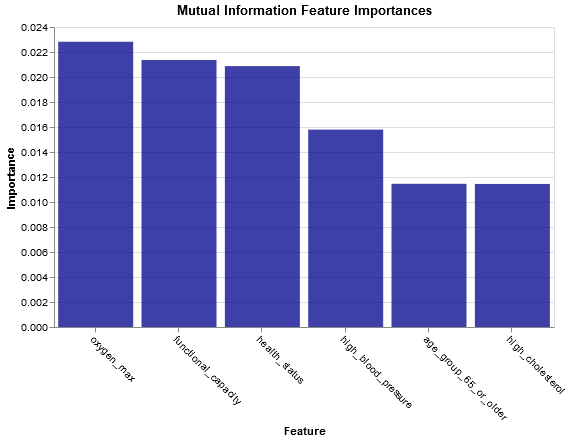

In [27]:
plot_imp(best_features_mutual_info, 
         feature_importances_mutual_info, 'Mutual Information', 'darkblue')

In [28]:
cv_results_mutual_info = cross_val_score(estimator=clfr,
                             X=Data[:, fs_indices_mutual_info],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_mutual_info.mean().round(3)

0.9

#### Using Random Forest Importance
There are five features that are selected using Random Forest Importance with 100 trees:
* weight, 
* oxygen max,  
* functional capacity,  
* height, and
* health status.

Accuracy performance: 90%.

In [29]:
# number of features to be selected
num_features = 5

In [30]:
from sklearn.ensemble import RandomForestClassifier

model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(Data, target)
fs_indices_rfi = np.argsort(model_rfi.feature_importances_)[::-1][0:num_features]

best_features_rfi = df.columns[fs_indices_rfi].values
best_features_rfi

array(['weight', 'oxygen_max', 'functional_capacity', 'height',
       'health_status'], dtype=object)

In [31]:
feature_importances_rfi = model_rfi.feature_importances_[fs_indices_rfi]
feature_importances_rfi

array([0.11910816, 0.09657687, 0.0952538 , 0.09165441, 0.07285325])

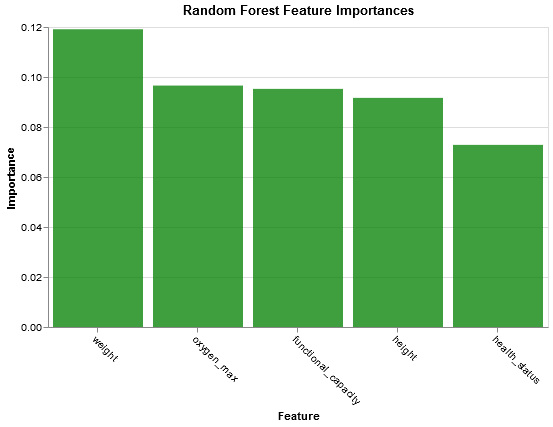

In [32]:
plot_imp(best_features_rfi, feature_importances_rfi, 'Random Forest', 'green')

In [33]:
cv_results_rfi = cross_val_score(estimator=clfr,
                             X=Data[:, fs_indices_rfi],
                             y=target, 
                             cv=cv_method, 
                             scoring=scoring_metric)
cv_results_rfi.mean().round(3)

0.9

### Sampling and Splitting
The preprocessed dataset has about 20 thousand rows. In order to test our algorithms, we split the dataset into a training sample and a test sample with a 70%:30% ratio using stratification.

In [35]:
print(Data.shape)

from sklearn.model_selection import train_test_split

Data_train, Data_test, \
target_train, target_test = train_test_split(Data, target, 
                                                    test_size = 0.3, random_state=999,
                                                    stratify = target)

print(Data_train.shape)
print(Data_test.shape)

(21725, 76)
(15207, 76)
(6518, 76)


### Model Evaluation Strategy
For each model, we will use 5-fold stratified cross-validation evaluation method with 2 repeats for hyperparameter tuning.

In [36]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv_method = RepeatedStratifiedKFold(n_repeats = 2,
                                    n_splits = 5, 
                                    random_state=999)

## Hyperparameter Tuning

### K-Nearest Neighbors (KNN)
The KNN algorithm uses two hyperparameters: the number of neighbors (n_neighbors) and the distance metric (p). Using a pipeline, feature selection is included when searching for the KNN hyperparameters. In the class below, feature selection using the Random Forest Importance (RFI) filtering method is defined as a step to the pipeline. 

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

# custom function for RFI feature selection inside a pipeline
# here we use n_estimators=100
class RFIFeatureSelector(BaseEstimator, TransformerMixin):
    
    # class constructor 
    # make sure class attributes end with a "_"
    # per scikit-learn convention to avoid errors
    def __init__(self, n_features_=5):
        self.n_features_ = n_features_
        self.fs_indices_ = None

    # override the fit function
    def fit(self, X, y):
        from sklearn.ensemble import RandomForestClassifier
        from numpy import argsort
        model_rfi = RandomForestClassifier(n_estimators=100)
        model_rfi.fit(X, y)
        self.fs_indices_ = argsort(model_rfi.feature_importances_)[::-1][0:self.n_features_] 
        return self 
    
    # override the transform function
    def transform(self, X, y=None):
        return X[:, self.fs_indices_]

For the scoring method we use recall to put more emphasis on true positive predictions. From our initial feature selection analysis, we saw that there are around six features that are more informative than others. In the KNN-algorithm we will therefore test for three to seven features. The number of neighbors will be kept low, since the feature space is dominated by negative target values ('no heart attack'). 

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN = {'rfi_fs__n_features_': [3, 4, 5, 6, 7],
                   'knn__n_neighbors': [1, 2, 3, 4, 5],
                   'knn__p': [1, 2]}

gs_pipe_KNN = GridSearchCV(estimator=pipe_KNN, 
                           param_grid=params_pipe_KNN, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='recall', ## puts more emphasis on getting positives correct
                           verbose=1)

In [39]:
gs_pipe_KNN.fit(Data_train, target_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   26.4s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:  4.2min finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000001D25141D978>,
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=5)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'rfi_fs__n_features_': [3, 4, 5, 6, 7], 'knn__n_neighbors': [1, 2, 3, 4, 5], 'knn__p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [40]:
gs_pipe_KNN.best_params_

{'knn__n_neighbors': 1, 'knn__p': 1, 'rfi_fs__n_features_': 5}

In [41]:
gs_pipe_KNN.best_score_

0.16017641325642296

We observe that the best KNN model selected 5 features with one nearest neighbor using the Manhattan distance (p=1). The recall score of this model is still only 0.160, which is kind of dissapointing. Below we look further into how this model performs on our test data.

In [42]:
t_pred = gs_pipe_KNN.best_estimator_.predict(Data_test)

In [43]:
from sklearn.metrics import classification_report

report = classification_report(target_test, t_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      6132
         1.0       0.14      0.14      0.14       386

   micro avg       0.90      0.90      0.90      6518
   macro avg       0.54      0.54      0.54      6518
weighted avg       0.90      0.90      0.90      6518



In [44]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(target_test, t_pred)
print(matrix)

[[5785  347]
 [ 331   55]]


Using a classification report and confusion matrix we see that this model has difficulty predicting those with a heart attack. In this situation it would be much more beneficial to be accurate on those with a heart attack, even if this means getting slightly more false positives. Below we attempt to influence our model by creating data with artificially increased numbers of heart attacks.

We make a new split for our training and test data. After splitting our data, we use all of the instances of those with a heart atack and only enough of those without to achieve a 20% rate of reporting a heart attack in our training data.

In [45]:
df_weighted = df.sample(n=15207, random_state=9)
df_weighted_test = df.drop(df_weighted.index.values, axis=0)

In [46]:
df_weighted_yes = df_weighted.loc[df_weighted['y_heart_attack']==1]
df_weighted_no = df_weighted.loc[df_weighted['y_heart_attack']==0]
print(df_weighted_yes.shape)
print(df_weighted_no.shape)

(891, 77)
(14316, 77)


In [47]:
df_weighted_train = df_weighted_no.sample(n=3574, random_state=87).append(df_weighted_yes)

In [48]:
Data_weighted_train = np.array(df_weighted_train.drop(columns='y_heart_attack'))
target_weighted_train = np.array(df_weighted_train['y_heart_attack'])

Data_weighted_test = np.array(df_weighted_test.drop(columns='y_heart_attack'))
target_weighted_test = np.array(df_weighted_test['y_heart_attack'])

We use the same pipeline as earlier, but this time on our weighted training data.

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

pipe_KNN_weighted = Pipeline(steps=[('rfi_fs', RFIFeatureSelector()), 
                           ('knn', KNeighborsClassifier())])

params_pipe_KNN_weighted = {'rfi_fs__n_features_': [3, 4, 5, 6, 7],
                   'knn__n_neighbors': [1, 2, 3, 4, 5],
                   'knn__p': [1, 2]}

gs_pipe_KNN_weighted = GridSearchCV(estimator=pipe_KNN_weighted, 
                           param_grid=params_pipe_KNN_weighted, 
                           cv=cv_method,
                           refit=True,
                           n_jobs=-2,
                           scoring='recall', ## puts more emphasis on getting positives correct
                           verbose=1)

In [50]:
gs_pipe_KNN_weighted.fit(Data_weighted_train, target_weighted_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 500 out of 500 | elapsed:  1.2min finished


GridSearchCV(cv=<sklearn.model_selection._split.RepeatedStratifiedKFold object at 0x000001D25141D978>,
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('rfi_fs', RFIFeatureSelector(n_features_=5)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-2,
       param_grid={'rfi_fs__n_features_': [3, 4, 5, 6, 7], 'knn__n_neighbors': [1, 2, 3, 4, 5], 'knn__p': [1, 2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [51]:
gs_pipe_KNN_weighted.best_params_

{'knn__n_neighbors': 1, 'knn__p': 1, 'rfi_fs__n_features_': 4}

In [52]:
gs_pipe_KNN_weighted.best_score_

0.34905236981177856

Adding more positive instances to the training data helped getting a higher recall score of 0.349. It is still a low score, but a huge improvement compared to the score using the normal training data. Using the weighted training data, the model is using four features with one nearest neighbour and using the Manhattan distance (p=1).

In [53]:
t_pred = gs_pipe_KNN_weighted.best_estimator_.predict(Data_weighted_test)

In [54]:
from sklearn.metrics import classification_report

report_weighted = classification_report(target_weighted_test, t_pred)
print(report_weighted)

              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      6121
         1.0       0.13      0.39      0.20       397

   micro avg       0.81      0.81      0.81      6518
   macro avg       0.54      0.61      0.55      6518
weighted avg       0.90      0.81      0.85      6518



In [55]:
from sklearn.metrics import confusion_matrix

matrix_weighted = confusion_matrix(target_weighted_test, t_pred)
print(matrix)
print(matrix_weighted)

[[5785  347]
 [ 331   55]]
[[5130  991]
 [ 243  154]]


Looking at the classification report and confusion martrix (with original for easy comparison), we see some improvement to the true positives, without too much of an increase in false positives. The improvement however still leaves much to be desired, as about two thirds of the positives are being classified incorrectly.

Let's put the results in one visualisation. In order to get the results in one object we use the following function to gather the necessary information.

In [56]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [57]:
results_KNN = get_search_results(gs_pipe_KNN)

In [58]:
results_KNN_weighted = get_search_results(gs_pipe_KNN_weighted)

In [59]:
results_KNN_features = results_KNN[results_KNN['rfi_fs__n_features_'] == 5.0]
results_KNN_features = results_KNN[results_KNN['knn__p'] == 1.0]
results_KNN_features = results_KNN_features.assign(type_KNN = "normal_KNN")
results_KNN_features.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_,type_KNN
2,0.160175,0.025197,0.198895,0.116667,1.0,1.0,5.0,normal_KNN
3,0.146882,0.021376,0.193370,0.121547,1.0,1.0,6.0,normal_KNN
4,0.143011,0.020531,0.165746,0.105556,1.0,1.0,7.0,normal_KNN
0,0.090341,0.030025,0.144444,0.049724,1.0,1.0,3.0,normal_KNN
24,0.085899,0.023594,0.121547,0.050000,3.0,1.0,7.0,normal_KNN


In [60]:
results_KNN_weighted_features = results_KNN_weighted[
    results_KNN_weighted['rfi_fs__n_features_'] == 4.0]
results_KNN_weighted_features = results_KNN_weighted[
    results_KNN_weighted['knn__p'] == 1.0]
results_KNN_weighted_features = results_KNN_weighted_features.assign(type_KNN = "weighted_KNN")
results_KNN_weighted_features.head()

,mean_score,std_score,max_score,min_score,knn__n_neighbors,knn__p,rfi_fs__n_features_,type_KNN
1,0.349043,0.043237,0.455056,0.303371,1.0,1.0,4.0,weighted_KNN
4,0.326034,0.020708,0.382022,0.303371,1.0,1.0,7.0,weighted_KNN
3,0.312538,0.027463,0.359551,0.269663,1.0,1.0,6.0,weighted_KNN
2,0.297392,0.027541,0.348315,0.258427,1.0,1.0,5.0,weighted_KNN
24,0.294583,0.035003,0.342697,0.230337,3.0,1.0,7.0,weighted_KNN


In [61]:
results_KNN_combined = pd.concat([results_KNN_weighted_features, results_KNN_features])

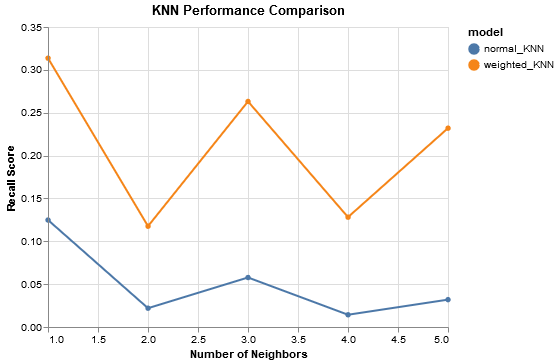

In [62]:
alt.Chart(results_KNN_combined, 
          title='KNN Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('knn__n_neighbors', title='Number of Neighbors'),
    alt.Y('mean_score', title='Recall Score', aggregate='average', 
          scale=alt.Scale(zero=False)),
    alt.Color('type_KNN', title = 'model')
)

As can be seen from the graph, the model that used the weighted training data performs much better than the model using the normal data. The recall score is still relatively low.

## Decision Trees (DT)

After some dissapointing results with our nearest neighbors approach, we build a DT. We use the gini index as the classifier and continue to include our RFIFeatureSelector in the pipeline.

In [63]:
from sklearn.tree import DecisionTreeClassifier

# with multiple dt_criterion
pipe_DT = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier())])

params_pipe_DT = {'rfi_fs__n_features_': [10, 20, Data.shape[1]],
                  'dt__criterion': ['gini', 'entropy'],
                  'dt__max_depth': [3, 4, 5, 6, 7]}

gs_pipe_DT = GridSearchCV(estimator=pipe_DT, 
                          param_grid=params_pipe_DT, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='recall',
                          verbose=1) 

gs_pipe_DT.fit(Data_train, target_train);

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:  2.2min finished


In [64]:
gs_pipe_DT.best_params_

{'dt__criterion': 'gini', 'dt__max_depth': 7, 'rfi_fs__n_features_': 10}

In [65]:
gs_pipe_DT.best_score_

0.040486700960750244

The decision tree model used the gini index for the splitting criterion. The maximum depth of the tree is equal to 7, using 10 features. Based on the score of 0.041, the model is not satisfactory at all. Below we look further into how this model performs on our test data.

In [66]:
results_DT = get_search_results(gs_pipe_DT)
results_DT.head()

,mean_score,std_score,max_score,min_score,dt__criterion,dt__max_depth,rfi_fs__n_features_
12,0.040488,0.0221044,0.0833333,0.0165746,gini,7,10
14,0.0377195,0.0157028,0.0666667,0.0110497,gini,7,76
13,0.0349478,0.0172403,0.0722222,0.00552486,gini,7,20
27,0.0305157,0.0189754,0.0611111,0.00552486,entropy,7,10
29,0.0277471,0.0192486,0.0555556,0,entropy,7,76


In [67]:
t_pred = gs_pipe_DT.best_estimator_.predict(Data_test)

In [68]:
from sklearn.metrics import classification_report

report_DT = classification_report(target_test, t_pred)
print(report_DT)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      6132
         1.0       0.32      0.04      0.07       386

   micro avg       0.94      0.94      0.94      6518
   macro avg       0.63      0.52      0.52      6518
weighted avg       0.91      0.94      0.91      6518



In [69]:
from sklearn.metrics import classification_report

report_DT = classification_report(target_test, t_pred)
print(report_DT)
from sklearn.metrics import confusion_matrix

matrix_DT = confusion_matrix(target_test, t_pred)
print(matrix_DT)

              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      6132
         1.0       0.32      0.04      0.07       386

   micro avg       0.94      0.94      0.94      6518
   macro avg       0.63      0.52      0.52      6518
weighted avg       0.91      0.94      0.91      6518

[[6098   34]
 [ 370   16]]


Even our "best" DT model performed pretty poorly however. Looking at the confusion matrix and classification reports we see it pretty much predicts all negatives. This is not a model we find satisfactory. As before we see if we can get better results by weighting our data.

In [71]:
from sklearn.tree import DecisionTreeClassifier

pipe_DT_weighted = Pipeline([('rfi_fs', RFIFeatureSelector()),
                    ('dt', DecisionTreeClassifier(criterion='gini'))])

params_pipe_DT_weighted = {'rfi_fs__n_features_': [5, 10, 20, 25],
                  'dt__max_depth': [3, 4, 5, 6, 7],
                  'dt__min_samples_split': [2, 3, 4]}

gs_pipe_DT_weighted = GridSearchCV(estimator=pipe_DT_weighted, 
                          param_grid=params_pipe_DT_weighted, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='recall',
                          verbose=1) 

gs_pipe_DT_weighted.fit(Data_weighted_train, target_weighted_train);

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 600 out of 600 | elapsed:  1.5min finished


In [72]:
gs_pipe_DT_weighted.best_params_

{'dt__max_depth': 6, 'dt__min_samples_split': 3, 'rfi_fs__n_features_': 25}

In [73]:
t_pred =gs_pipe_DT_weighted.best_estimator_.predict(Data_weighted_test)

In [74]:
from sklearn.metrics import classification_report

report_DT_weighted = classification_report(target_weighted_test, t_pred)
print(report_DT_weighted)

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      6121
         1.0       0.23      0.32      0.27       397

   micro avg       0.89      0.89      0.89      6518
   macro avg       0.59      0.63      0.61      6518
weighted avg       0.91      0.89      0.90      6518



In [75]:
from sklearn.metrics import confusion_matrix

matrix_DT_weighted = confusion_matrix(target_weighted_test, t_pred)
print(matrix_DT_weighted)
print(matrix_DT)

[[5691  430]
 [ 268  129]]
[[6098   34]
 [ 370   16]]


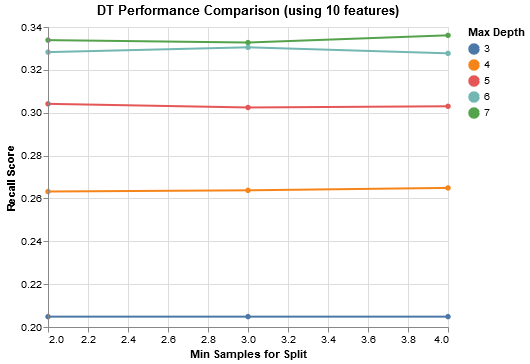

In [108]:
results_DT_weighted = get_search_results(gs_pipe_DT_weighted)

results_DT_features_weighted = results_DT_weighted[results_DT_weighted['rfi_fs__n_features_'] == 10.0]

alt.Chart(results_DT_features_weighted, 
          title='DT Performance Comparison (using 10 features)'
         ).mark_line(point=True).encode(
    alt.X('dt__min_samples_split', title='Min Samples for Split'),
    alt.Y('mean_score', title='Recall Score', scale=alt.Scale(zero=False)),
    alt.Color('dt__max_depth:N', title='Max Depth')
)

Again the weighted model produces more true positives than the unweighted. Our DT models are however even further from satisfactory results than the KNN. Perhaps we will see more exciting numbers with our Naive Bayes model.

## Naive Bayes (NB)

For the Naive Bayes model we use a Laplacian Smoothing with hyperparameter var_smoothing. To find the optimal var_smoothing value we conduct a grid search with 100 values between 10 and 10^-9. To save computation time, instead of a full grid search a randomized search is performed over 20 values. 

We start by transforming the data to a Gaussian distribution after which we fit the model with our training data.

In [77]:
from sklearn.preprocessing import PowerTransformer
Data_transformed = PowerTransformer().fit_transform(Data_train)
test_transformed = PowerTransformer().fit_transform(Data_test)

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV

pipe_NB = Pipeline([('rfi_fs', RFIFeatureSelector()), 
                     ('nb', GaussianNB())])

params_pipe_NB = {'rfi_fs__n_features_': [5, 10, 15, 20, 25],
                  'nb__var_smoothing': np.logspace(1,-9, num=100)}

n_iter_search = 20
gs_pipe_NB = RandomizedSearchCV(estimator=pipe_NB, 
                          param_distributions=params_pipe_NB, 
                          cv=cv_method,
                          refit=True,
                          n_jobs=-2,
                          scoring='recall',
                          n_iter=n_iter_search,
                          verbose=1, 
                           random_state = 8) 

gs_pipe_NB.fit(Data_transformed, target_train);

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:  1.9min finished


In [79]:
gs_pipe_NB.best_params_

{'rfi_fs__n_features_': 20, 'nb__var_smoothing': 3.3516026509388407e-07}

In [80]:
gs_pipe_NB.best_score_

0.43021709252100027

With the Naive Bayes model, we are able to get a recall score of 0.440 which is a huge improvement compared to previous model fittings. 20 features were used with a very small smoothing hyperparameter.

In [81]:
results_NB = get_search_results(gs_pipe_NB)
results_NB.head()

,mean_score,std_score,max_score,min_score,rfi_fs__n_features_,nb__var_smoothing
9,0.430221,0.046798,0.494444,0.337017,20.0,3.351603e-07
19,0.426329,0.042497,0.494444,0.337017,20.0,2.782559e-05
14,0.419662,0.038669,0.475138,0.337017,20.0,4.132012e-08
8,0.419098,0.056909,0.505556,0.337017,25.0,5.336699e-07
17,0.417431,0.047633,0.483333,0.337017,25.0,5.214008e-08


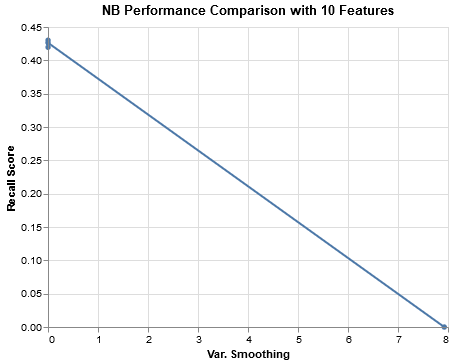

In [82]:
results_NB_features = results_NB[results_NB['rfi_fs__n_features_'] == 20.0]

alt.Chart(results_NB_features, 
          title='NB Performance Comparison with 10 Features'
         ).mark_line(point=True).encode(
    alt.X('nb__var_smoothing', title='Var. Smoothing'),
    alt.Y('mean_score', title='Recall Score', scale=alt.Scale(zero=False))
)

In [83]:
t_pred = gs_pipe_NB.best_estimator_.predict(test_transformed)

In [84]:
from sklearn.metrics import classification_report

report_NB = classification_report(target_test, t_pred)
print(report_NB)

              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      6132
         1.0       0.20      0.42      0.27       386

   micro avg       0.86      0.86      0.86      6518
   macro avg       0.58      0.66      0.60      6518
weighted avg       0.92      0.86      0.89      6518



In [85]:
from sklearn.metrics import confusion_matrix

matrix_NB = confusion_matrix(target_test, t_pred)
print(matrix_NB)

[[5465  667]
 [ 222  164]]


The confusion matrix also shows better results for the true positives. As with the KNN using weighted training data, the model generates many false positives.

## Performance Comparison

In this section we will perform pairwise t-tests for the KNN, DT and NB models to see whether one model is different compared to another model. As a model strategy we use a 10-fold stratified cross validation on each model. We are again interested in the recall score of each model as the performance metric of predicting the test data. A paired t-test is then conducted on these recall scores to test on difference between models. We will be testing on a confidence level of 5%.

In [86]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv_method_ttest = StratifiedKFold(n_splits=10, random_state=111)

cv_results_KNN = cross_val_score(estimator=gs_pipe_KNN.best_estimator_,
                                 X=Data_test,
                                 y=target_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='recall')
print(cv_results_KNN.mean())

cv_results_KNN_weighted = cross_val_score(estimator=gs_pipe_KNN_weighted.best_estimator_,
                                 X=Data_weighted_test,
                                 y=target_weighted_test, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='recall')
cv_results_KNN_weighted.mean()

0.16828609986504722


0.07070512820512821

In [88]:
cv_results_DT = cross_val_score(estimator=gs_pipe_DT.best_estimator_,
                                X=Data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='recall')
print(cv_results_DT.mean())

cv_results_DT_weighted = cross_val_score(estimator=gs_pipe_DT_weighted.best_estimator_,
                                X=Data_weighted_test,
                                y=target_weighted_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='recall')
cv_results_DT_weighted.mean()

0.062213225371120104


0.0632051282051282

In [87]:
cv_results_NB = cross_val_score(estimator=gs_pipe_NB.best_estimator_,
                                X=Data_test,
                                y=target_test, 
                                cv=cv_method_ttest, 
                                n_jobs=-2,
                                scoring='recall')
cv_results_NB.mean()

0.3882591093117409

In [89]:
from scipy import stats

print(stats.ttest_rel(cv_results_KNN, cv_results_NB))
print(stats.ttest_rel(cv_results_DT, cv_results_KNN))
print(stats.ttest_rel(cv_results_DT, cv_results_NB))

print(stats.ttest_rel(cv_results_KNN_weighted, cv_results_NB))
print(stats.ttest_rel(cv_results_DT_weighted, cv_results_KNN_weighted))
print(stats.ttest_rel(cv_results_DT_weighted, cv_results_NB))

Ttest_relResult(statistic=-5.284417900860191, pvalue=0.0005041445021740805)
Ttest_relResult(statistic=-5.11114493030693, pvalue=0.000635520835515637)
Ttest_relResult(statistic=-9.796124240357948, pvalue=4.246332310678037e-06)
Ttest_relResult(statistic=-8.557777001153678, pvalue=1.2868443300571149e-05)
Ttest_relResult(statistic=-0.6559189546966474, pvalue=0.5282863482740976)
Ttest_relResult(statistic=-7.604883965560866, pvalue=3.3098373817099915e-05)


For each paired t-test, the p-value is smaller than our chosen confidence level of 5%. In conclusion, at a 95% significance level, the Naive Bayes is statistically the best model in terms of recall score when compared on the test data.

To evaluate the models based on the test set further, the classificatoin reports for each model are shown below. 

In [90]:
pred_KNN = gs_pipe_KNN.predict(Data_test)
pred_KNN_weighted = gs_pipe_KNN_weighted.predict(Data_weighted_test)

pred_DT = gs_pipe_DT.predict(Data_test)
pred_DT_weighted = gs_pipe_DT_weighted.predict(Data_weighted_test)

Data_test_transformed = PowerTransformer().fit_transform(Data_test)
pred_NB = gs_pipe_NB.predict(Data_test_transformed)

In [91]:
from sklearn import metrics
print("\nClassification report for K-Nearest Neighbor") 
print(metrics.classification_report(target_test, pred_KNN))
print("\nClassification report for K-Nearest Neighbor (using weighted data)") 
print(metrics.classification_report(target_weighted_test, pred_KNN_weighted))
print("\nClassification report for Decision Tree") 
print(metrics.classification_report(target_test, pred_DT))
print("\nClassification report for Decision Tree (using weighted data)") 
print(metrics.classification_report(target_weighted_test, pred_DT_weighted))
print("\nClassification report for Naive Bayes") 
print(metrics.classification_report(target_test, pred_NB))


Classification report for K-Nearest Neighbor
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.94      6132
         1.0       0.14      0.14      0.14       386

   micro avg       0.90      0.90      0.90      6518
   macro avg       0.54      0.54      0.54      6518
weighted avg       0.90      0.90      0.90      6518


Classification report for K-Nearest Neighbor (using weighted data)
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      6121
         1.0       0.13      0.39      0.20       397

   micro avg       0.81      0.81      0.81      6518
   macro avg       0.54      0.61      0.55      6518
weighted avg       0.90      0.81      0.85      6518


Classification report for Decision Tree
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      6132
         1.0       0.32      0.04      0.07       386

   micro avg       0.94    

In [92]:
from sklearn import metrics
print("\nConfusion matrix for K-Nearest Neighbour") 
print(metrics.confusion_matrix(target_test, pred_KNN_weighted))
print("\nConfusion matrix for K-Nearest Neighbour (using weighted data)") 
print(metrics.confusion_matrix(target_weighted_test, pred_KNN_weighted))
print("\nConfusion matrix for Decision Tree") 
print(metrics.confusion_matrix(target_test, pred_DT))
print("\nConfusion matrix for Decision Tree (using weighted data)") 
print(metrics.confusion_matrix(target_weighted_test, pred_DT_weighted))
print("\nConfusion matrix for Naive Bayes") 
print(metrics.confusion_matrix(target_test, pred_NB))


Confusion matrix for K-Nearest Neighbour
[[5057 1075]
 [ 316   70]]

Confusion matrix for K-Nearest Neighbour (using weighted data)
[[5130  991]
 [ 243  154]]

Confusion matrix for Decision Tree
[[6098   34]
 [ 370   16]]

Confusion matrix for Decision Tree (using weighted data)
[[5691  430]
 [ 268  129]]

Confusion matrix for Naive Bayes
[[5465  667]
 [ 222  164]]


The confusion matrix and classification reports confirm what we have concluded before. The Naive Bayes model is able to get a higher number of true positives with also a higher true positive rate. The model however also predicts many false positives, which is not very satisfactory but at least the true negatives are relatively lower.

## Limitations and Proposed Solutions

Our modeling strategy produced results that were under what we were hoping for. Even our best model failed to correctly classify half of those having a heart attack in the test data. This leaves much to be desired. There may be a limit to how well we can classify heart attacks with this data, but one way we may have been able to achieve higher results would be to use more data. We only used the data from one month of the survey to achieve shorter run times. We could re-run the experiments with the full years data to give our models an extra edge.

While building our NB algorithm, we performed our power transformation across all features including our dummy features in the data. If we built a Guassian NB and Bernoulli NB separately on the numerical and dummy features, and calculated the final prediction percentage by multiplying the two models together we may have found more satisfactory results.

Even without this extra step our NB algorithm outperformed all others. With the above change as well as changing the threshold in our prediction to something below .5, we would probabaly be able to find a model that predicts a higher percentage of those with a heart attack. Although this may increase the amount of false positives, it would serve a better purpose than our current model.

## Summary

Our Naive Bayes model using 20 of the best features selected by the Random Forest Importance and a variable smoothing parameter of 3.3516e-07 produced the highest cross-validated recall score on our training data. When we evaluated all of our models on the test set, this model also outperformed the others with a recall score of 0.42 on our positive target feature. A couple of our models out performed this had slightly less false positives, but considering the real life cost of predicting someone is going to have a heart attack and being wrong compared to predicting they wont and being wrong, we feel this model is best fit for real world classification.

## References

* Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/(http://www.scipy.org/) [Accessed 2019-06-08]
* Center for Disease Control and Prevention. BRFSS Survey Data and Documentation, 2017 [data file and
codebook]. https://www.cdc.gov/brfss/annual_data/annual_2017.html